In [1]:
import sys

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import gc
from matplotlib import gridspec
import time
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import h5py

from unfold import weighted_binary_crossentropy
from get_np_arrays import *
from process_functions import *

import os
os.environ['CUDA_VISIBLE_DEVICES']="3"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

tf.config.experimental.set_memory_growth(physical_devices[0], True)

from matplotlib import style
style.use('/global/home/users/ftoralesacosta/dotfiles/scientific.mplstyle')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
label = {}
label['sys0'] = 'HFS scale (in jet)'
label['sys1'] = 'HFS scale (remainder)'
label['sys5'] = 'HFS $\phi$ angle' 
label['sys7'] = 'Lepton energy scale'
label['sys11'] = 'Lepton $\phi$ angle'
label['QED']  = 'QED rad corr.'
keys=['sys0','sys1','sys5','sys7','sys11']

#label['sys4'] = 'HFS polar angle'
#label['sys10'] = 'Lepton polar angle'
#label['QED'] = 'QED rad corr.'

In [3]:
mc_names = ['Rapgap','Rapgap','Rapgap','Rapgap','Rapgap','Rapgap'] 
mc_tags = ['nominal','sys_0','sys_1','sys_5','sys_7','sys_11']

## Get npy files of $q_\perp, \phi$ and OmniFold weights

In [4]:
#Calculate q_perp and asymmetry for ALL the variations. save as NPY
reprocess_systematics = False
if (reprocess_systematics):
    for mc_i in range(len(mc_names)):
        mc_name = mc_names[mc_i]
        mc_tag = mc_tags[mc_i]
        mc_label = mc_name+"_"+mc_tag
    
        print("on sample:",mc_name,mc_tag)
        npy_from_pkl(mc_label)
        print("\n\n")

In [5]:
#N_Bins = 10
q_max = 10.0
#q_perp_bins = np.linspace(0,q_max,N_Bins+1)
q_perp_bins = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  8., 10.])
N_Bins = len(q_perp_bins)-1

In [6]:
print(q_perp_bins)

[ 0.  1.  2.  3.  4.  5.  6.  8. 10.]


In [7]:
#Data Unfolded From Rapgap
cuts_h1rpgp       = np.load('from_rapgap_cuts.npy')
jet_pT_h1rpgp     = np.load('from_rapgap_jet_pT.npy')[cuts_h1rpgp]
q_perp_h1rpgp     = np.load('from_rapgap_q_perp.npy')[cuts_h1rpgp]
asymm_phi_h1rpgp  = np.load('from_rapgap_asymm_angle.npy')[cuts_h1rpgp]
weights_h1rpgp    = np.load('from_rapgap_weights.npy')[cuts_h1rpgp]
mc_weights_h1rpgp = np.load("from_rapgap_mc_weights.npy")[cuts_h1rpgp]
nn_weights_h1rpgp = np.load("from_rapgap_nn_weights.npy")[cuts_h1rpgp]

btstrp_errors = np.load("rapgap_btstrp_errors.npy")

In [9]:
nominal_cuts   = np.load("npy_files/Rapgap_nominal_cuts.npy")                                                                                                                                                                                                                     
nominal_q_perp    = np.load("npy_files/Rapgap_nominal_q_perp.npy")[nominal_cuts]                                                                                                                                                                                                        
nominal_asymm_phi = np.load("npy_files/Rapgap_nominal_asymm_angle.npy")[nominal_cuts]                                                                                                                                                                                                   
nominal_weights   = np.load("npy_files/Rapgap_nominal_weights.npy")[nominal_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(nominal, q_perp_bins, nominal_q_perp, nominal_asymm_phi,nominal_weights)

sys0_cuts      = np.load("npy_files/Rapgap_sys_0_cuts.npy")                                                                                                                                                                                                                     
sys0_q_perp    = np.load("npy_files/Rapgap_sys_0_q_perp.npy")[sys0_cuts]                                                                                                                                                                                                        
sys0_asymm_phi = np.load("npy_files/Rapgap_sys_0_asymm_angle.npy")[sys0_cuts]                                                                                                                                                                                                   
sys0_weights   = np.load("npy_files/Rapgap_sys_0_weights.npy")[sys0_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(sys0, q_perp_bins, sys0_q_perp, sys0_asymm_phi,sys0_weights)                                                                                                                                                                                                  
                                                                                                                                                                                                                                                                                
sys1_cuts      = np.load("npy_files/Rapgap_sys_1_cuts.npy")                                                                                                                                                                                                                     
sys1_q_perp    = np.load("npy_files/Rapgap_sys_1_q_perp.npy")[sys1_cuts]                                                                                                                                                                                                        
sys1_asymm_phi = np.load("npy_files/Rapgap_sys_1_asymm_angle.npy")[sys1_cuts]                                                                                                                                                                                                   
sys1_weights   = np.load("npy_files/Rapgap_sys_1_weights.npy")[sys1_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(sys1, q_perp_bins, sys1_q_perp, sys1_asymm_phi,sys1_weights)                                                                                                                                                                                                  
                                                                                                                                                                                                                                                                                
sys5_cuts      = np.load("npy_files/Rapgap_sys_5_cuts.npy")                                                                                                                                                                                                                     
sys5_q_perp    = np.load("npy_files/Rapgap_sys_5_q_perp.npy")[sys5_cuts]                                                                                                                                                                                                        
sys5_asymm_phi = np.load("npy_files/Rapgap_sys_5_asymm_angle.npy")[sys5_cuts]                                                                                                                                                                                                   
sys5_weights   = np.load("npy_files/Rapgap_sys_5_weights.npy")[sys5_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(sys5, q_perp_bins, sys5_q_perp, sys5_asymm_phi,sys5_weights)                                                                                                                                                                                                  
                                                                                                                                                                                                                                                                                
sys7_cuts      = np.load("npy_files/Rapgap_sys_7_cuts.npy")                                                                                                                                                                                                                     
sys7_q_perp    = np.load("npy_files/Rapgap_sys_7_q_perp.npy")[sys7_cuts]                                                                                                                                                                                                        
sys7_asymm_phi = np.load("npy_files/Rapgap_sys_7_asymm_angle.npy")[sys7_cuts]                                                                                                                                                                                                   
sys7_weights   = np.load("npy_files/Rapgap_sys_7_weights.npy")[sys7_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(sys7, q_perp_bins, sys7_q_perp, sys7_asymm_phi,sys7_weights)                                                                                                                                                                                                  
                                                                                                                                                                                                                                                                               
sys11_cuts      = np.load("npy_files/Rapgap_sys_11_cuts.npy")                                                                                                                                                                                                                   
sys11_q_perp    = np.load("npy_files/Rapgap_sys_11_q_perp.npy")[sys11_cuts]                                                                                                                                                                                                     
sys11_asymm_phi = np.load("npy_files/Rapgap_sys_11_asymm_angle.npy")[sys11_cuts]                                                                                                                                                                                                
sys11_weights   = np.load("npy_files/Rapgap_sys_11_weights.npy")[sys11_cuts]
averages_in_qperp_bins(sys11, q_perp_bins, sys11_q_perp, sys11_asymm_phi,sys11_weights)

# Get Model Systematics: Bias of Unfolding Procedure

In [10]:
cuts       = np.load('cuts.npy')
q_perp     = np.load('q_perp.npy')[cuts]
asymm_phi  = np.load('asymm_angle.npy')[cuts]
weights    = np.load('weights.npy')[cuts]

h1_djgo = dict(zip(
["q_perp","phi","cos1","cos2","cos3","errors"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

averages_in_qperp_bins(h1_djgo, q_perp_bins, q_perp, asymm_phi,weights)

model_difference = {}
for key in ["q_perp","phi","cos1","cos2","cos3"]:
    model_difference[key] = np.abs(nominal[key]-h1_djgo[key])

# QED Radiation Correction

In [11]:
recalc_QED_npy = False
if (recalc_QED_npy):
    QED_path = "/clusterfs/ml4hep_nvme2/ftoralesacosta/h1_check/h1_lepton_jet_asymmetry/"
    for QED_label in ["Rapgap_nominal_Rady", "Rapgap_nominal_noRady", "Django_nominal_Rady", "Django_nominal_noRady"]:
        npy_from_pkl(QED_label,False,QED_path)

In [12]:
QED_Rapgap_Rady = {}
nominal_Rady_cuts   = np.load("npy_files/Rapgap_nominal_Rady_cuts.npy")                                                                                                                                                                                                                     
nominal_Rady_q_perp    = np.load("npy_files/Rapgap_nominal_Rady_q_perp.npy")[nominal_Rady_cuts]                                                                                                                                                                                                        
nominal_Rady_asymm_phi = np.load("npy_files/Rapgap_nominal_Rady_asymm_angle.npy")[nominal_Rady_cuts]                                                                                                                                                                                                   
nominal_Rady_weights   = np.load("npy_files/Rapgap_nominal_Rady_weights.npy")[nominal_Rady_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(QED_Rapgap_Rady, q_perp_bins, nominal_Rady_q_perp, nominal_Rady_asymm_phi,nominal_Rady_weights)

QED_Rapgap_noRady = {}
nominal_noRady_cuts   = np.load("npy_files/Rapgap_nominal_noRady_cuts.npy")                                                                                                                                                                                                                     
nominal_noRady_q_perp    = np.load("npy_files/Rapgap_nominal_noRady_q_perp.npy")[nominal_noRady_cuts]                                                                                                                                                                                                        
nominal_noRady_asymm_phi = np.load("npy_files/Rapgap_nominal_noRady_asymm_angle.npy")[nominal_noRady_cuts]                                                                                                                                                                                                   
nominal_noRady_weights   = np.load("npy_files/Rapgap_nominal_noRady_weights.npy")[nominal_noRady_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(QED_Rapgap_noRady, q_perp_bins, nominal_noRady_q_perp, nominal_noRady_asymm_phi,nominal_noRady_weights)

QED_Django_Rady = {}
nominal_Rady_cuts   = np.load("npy_files/Rapgap_nominal_Rady_cuts.npy")                                                                                                                                                                                                                     
nominal_Rady_q_perp    = np.load("npy_files/Rapgap_nominal_Rady_q_perp.npy")[nominal_Rady_cuts]                                                                                                                                                                                                        
nominal_Rady_asymm_phi = np.load("npy_files/Rapgap_nominal_Rady_asymm_angle.npy")[nominal_Rady_cuts]                                                                                                                                                                                                   
nominal_Rady_weights   = np.load("npy_files/Rapgap_nominal_Rady_weights.npy")[nominal_Rady_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(QED_Django_Rady, q_perp_bins, nominal_Rady_q_perp, nominal_Rady_asymm_phi,nominal_Rady_weights)

QED_Rapgap_noRady = {}
nominal_noRady_cuts   = np.load("npy_files/Rapgap_nominal_noRady_cuts.npy")                                                                                                                                                                                                                     
nominal_noRady_q_perp    = np.load("npy_files/Rapgap_nominal_noRady_q_perp.npy")[nominal_noRady_cuts]                                                                                                                                                                                                        
nominal_noRady_asymm_phi = np.load("npy_files/Rapgap_nominal_noRady_asymm_angle.npy")[nominal_noRady_cuts]                                                                                                                                                                                                   
nominal_noRady_weights   = np.load("npy_files/Rapgap_nominal_noRady_weights.npy")[nominal_noRady_cuts]                                                                                                                                                                                                       
averages_in_qperp_bins(QED_Rapgap_noRady, q_perp_bins, nominal_noRady_q_perp, nominal_noRady_asymm_phi,nominal_noRady_weights)

___

In [13]:
# open a file, where you ant to store the data
file = open('nominal_binned.pkl', 'wb')
pickle.dump(nominal, file,protocol=pickle.HIGHEST_PROTOCOL)
file.close()

file = open('sys0_binned.pkl', 'wb')
pickle.dump(sys0, file,protocol=pickle.HIGHEST_PROTOCOL)
file.close()

file = open('sys1_binned.pkl', 'wb')
pickle.dump(sys1, file,protocol=pickle.HIGHEST_PROTOCOL)
file.close()

file = open('sys5_binned.pkl', 'wb')
pickle.dump(sys5, file,protocol=pickle.HIGHEST_PROTOCOL)
file.close()

file = open('sys7_binned.pkl', 'wb')
pickle.dump(sys7, file,protocol=pickle.HIGHEST_PROTOCOL)
file.close()

file = open('sys11_binned.pkl', 'wb')
pickle.dump(sys11, file,protocol=pickle.HIGHEST_PROTOCOL)
file.close()

In [14]:
dicts = {}
dicts['sys0'] = sys0
dicts['sys1'] = sys1
dicts['sys5'] = sys5
dicts['sys7'] = sys7
dicts['sys11'] = sys11
dicts['nominal'] = nominal

In [15]:
systematics = {}
systematics['sys0']  = {key: np.abs(nominal[key] - sys0.get(key, 0))  for key in nominal.keys()}
systematics['sys1']  = {key: np.abs(nominal[key] - sys1.get(key, 0))  for key in nominal.keys()}
systematics['sys5']  = {key: np.abs(nominal[key] - sys5.get(key, 0))  for key in nominal.keys()}
systematics['sys7']  = {key: np.abs(nominal[key] - sys7.get(key, 0))  for key in nominal.keys()}
systematics['sys11'] = {key: np.abs(nominal[key] - sys11.get(key,0))  for key in nominal.keys()}
systematics['model'] = model_difference
file = open('systematics.pkl', 'wb')
pickle.dump(systematics, file,protocol=pickle.HIGHEST_PROTOCOL)
file.close() 

In [16]:
total_sys = {}
total_minus_model = {}
for key in ["q_perp","phi","cos1","cos2","cos3"]:
    total_sys[key] = (nominal[key]-sys0[key])**2
    total_sys[key] += (nominal[key]-sys1[key])**2
    total_sys[key] += (nominal[key]-sys5[key])**2
    total_sys[key] += (nominal[key]-sys7[key])**2
    total_sys[key] += (nominal[key]-sys11[key])**2
    total_minus_model[key] = np.sqrt(total_sys[key])
    
    total_sys[key] += model_difference[key]**2
    total_sys[key] = np.sqrt(total_sys[key])
    
systematics['total_no_model'] = total_minus_model
systematics['total'] = total_sys
    
file = open('systematics.pkl', 'wb')
pickle.dump(systematics, file,protocol=pickle.HIGHEST_PROTOCOL)
file.close() 

In [17]:
print(systematics['sys0']['cos1'])
print(nominal['q_perp'])
print(systematics["total"]["cos1"])

[0.0051673  0.01111118 0.01676609 0.02363471 0.03174109 0.03796524
 0.0419922  0.04553015]
[0.61802784 1.45053311 2.45679844 3.40681659 4.42643528 5.43657413
 6.77991946 8.81393164]
[0.03940403 0.0458166  0.02545254 0.03245351 0.04382287 0.05030529
 0.05967742 0.08085907]


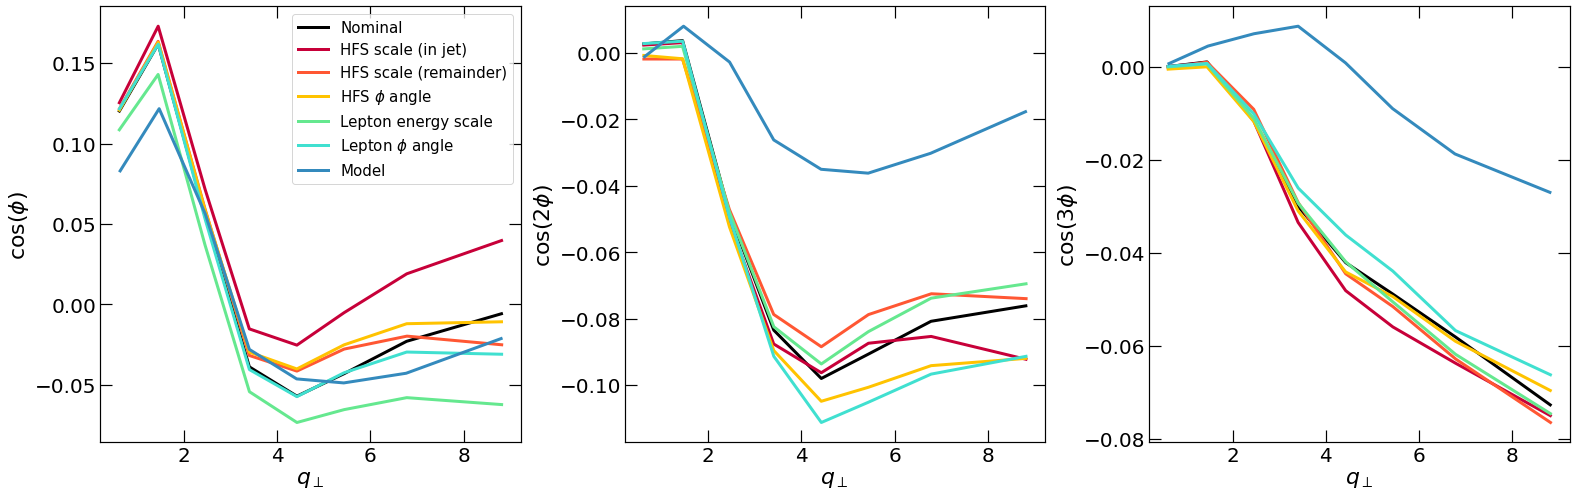

In [18]:
keys=["q_perp","cos1","cos2","cos3"]
colors = ['#348ABD','#C70039','#FF5733','#FFC300','#65E88F','#40E0D0']
fig,axes = plt.subplots(1,3,figsize=(22,7))
#fig = plt.figure(figsize=(10,8))
#colors=["blue","purple","red"]
for i,key in enumerate(keys[1:]):
    axes[i].errorbar(nominal["q_perp"],nominal[key],
                     label="Nominal",color="k",linewidth=3)
    
    axes[i].errorbar(sys0["q_perp"],sys0[key],
                     label=label['sys0'],color=colors[1],linewidth=3)
    
    axes[i].errorbar(sys1["q_perp"],sys1[key],
                     label=label['sys1'],color=colors[2],linewidth=3)
    
    axes[i].errorbar(sys5["q_perp"],sys5[key],
                     label=label['sys5'],color=colors[3],linewidth=3)
    
    axes[i].errorbar(sys7["q_perp"],sys7[key],
                     label=label['sys7'],color=colors[4],linewidth=3)
    
    axes[i].errorbar(sys11["q_perp"],sys11[key],
                     label=label['sys11'],color=colors[5],linewidth=3)
    
    axes[i].errorbar(h1_djgo["q_perp"],h1_djgo[key],
                     label='Model',color=colors[0],linewidth=3)
    
    
    string = r"$\cos(%i\phi)$"%(i+1)
    string = string.replace("1","")
    axes[i].set_ylabel(string)
    axes[i].set_xlabel("$q_\perp$")
    axes[0].legend(fontsize=15)


plt.tight_layout()
plt.savefig("systematics_unfolded_separately.pdf")

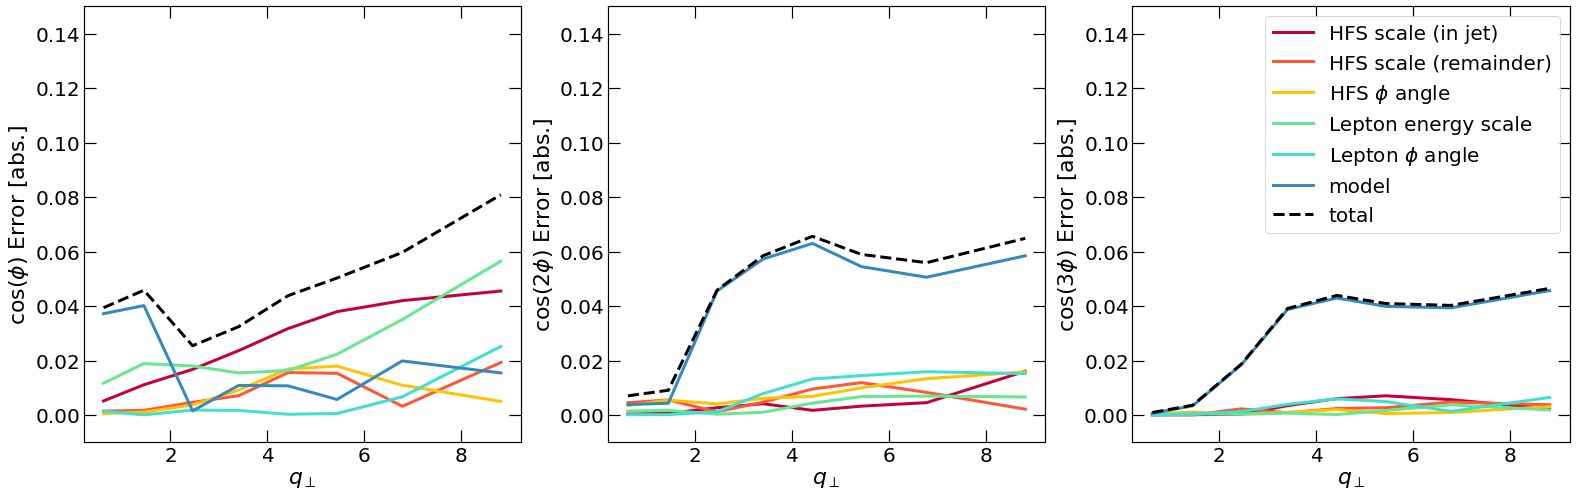

In [19]:
keys=["q_perp","cos1","cos2","cos3"]
colors = ['#348ABD','#C70039','#FF5733','#FFC300','#65E88F','#40E0D0']
fig,axes = plt.subplots(1,3,figsize=(22,7))
#fig = plt.figure(figsize=(10,8))
#colors=["blue","purple","red"]

plot_model = True
for i,key in enumerate(keys[1:]):
    
    axes[i].errorbar(sys0["q_perp"],np.abs(nominal[key] - sys0[key]),
                     label=label['sys0'],color=colors[1],linewidth=3)
                                                   
    axes[i].errorbar(sys1["q_perp"],np.abs(nominal[key] - sys1[key]),
                     label=label['sys1'],color=colors[2],linewidth=3)
                                                   
    axes[i].errorbar(sys5["q_perp"],np.abs(nominal[key] - sys5[key]),
                     label=label['sys5'],color=colors[3],linewidth=3)
                                                   
    axes[i].errorbar(sys7["q_perp"],np.abs(nominal[key] - sys7[key]),
                     label=label['sys7'],color=colors[4],linewidth=3)
                                                   
    axes[i].errorbar(sys11["q_perp"],np.abs(nominal[key] - sys11[key]),
                     label=label['sys11'],color=colors[5],linewidth=3)
    
    if (plot_model):
        axes[i].errorbar(sys11["q_perp"],model_difference[key],
                    label="model",color=colors[0],linewidth=3)
    
        axes[i].errorbar(sys11["q_perp"],systematics['total'][key],
                     label='total',color='k',linewidth=3,ls='--')
    else:
        axes[i].errorbar(sys11["q_perp"],total_minus_model[key],
                     label='total',color='k',linewidth=3,ls='--')
                                                   
    string = r"$\cos(%i\phi)$ Error [abs.]"%(i+1)
    string = string.replace("1","")
    axes[i].set_ylabel(string)
    axes[i].set_xlabel("$q_\perp$")
    
axes[0].set_ylim(-0.01,0.15)
axes[1].set_ylim(-0.01,0.15)
axes[2].set_ylim(-0.01,0.15)


plt.tight_layout()
plt.legend(fontsize=20)
plt.savefig("absError_systematics_unfolded_separately.pdf")

In [20]:
print(systematics['total']['cos1'])

[0.03940403 0.0458166  0.02545254 0.03245351 0.04382287 0.05030529
 0.05967742 0.08085907]
